# Loading in our data from main.ipynb to build the initial model

### Loading the data

In [68]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

with open("prepared_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val = data["X_val"]
X_test = data["X_test"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
num_classes = data["num_classes"]

### Data Normalization

In [69]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

### Building the model

In [70]:
def leNet_model_iteration6(num_classes):
    model = Sequential()
    model.add(Conv2D(64, (5,5), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = leNet_model_iteration6(num_classes)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


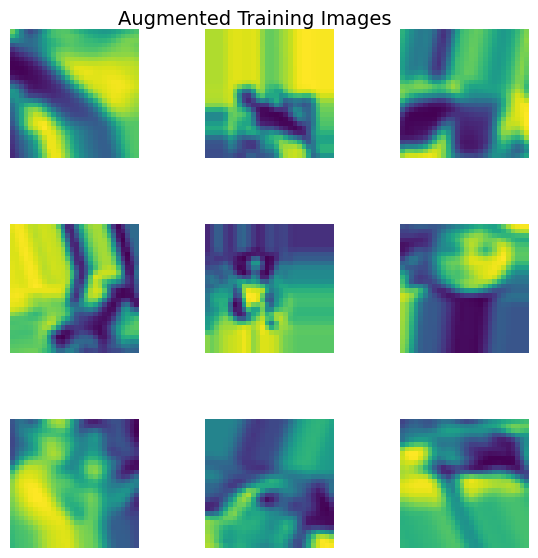

In [71]:
datagen = ImageDataGenerator(
    width_shift_range=0.5,
    height_shift_range=0.2,
    zoom_range=0.4,
    shear_range=0.3,
    rotation_range=15
)

datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=50)

batches = datagen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
fig.tight_layout()

for i in range(9):
    r = i // 3
    c = i % 3
    axs[r, c].imshow(X_batch[i])
    axs[r, c].axis('off')

plt.suptitle('Augmented Training Images', fontsize=14)
plt.show()

### Training the model

In [72]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 50,
    epochs=30,
    batch_size=50,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


819/819 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.1464 - loss: 2.6649 - val_accuracy: 0.2549 - val_loss: 2.4081
Epoch 2/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.1986 - loss: 2.5391 - val_accuracy: 0.2837 - val_loss: 2.3365
Epoch 3/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2320 - loss: 2.4670 - val_accuracy: 0.3077 - val_loss: 2.2736
Epoch 4/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.2478 - loss: 2.4279 - val_accuracy: 0.3308 - val_loss: 2.2178
Epoch 5/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.2635 - loss: 2.3707 - val_accuracy: 0.3246 - val_loss: 2.1962
Epoch 6/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.2699 - loss: 2.3625 - val_accuracy: 0.3578 - val_loss: 2.1517
Epoch 7/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2817 - loss: 2.3326 - val_accuracy: 0.3580 - val_loss: 2.1127
Epoch 8/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2866 - loss: 2.3203 - val_accurac

### Evaluating the model

285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5571 - loss: 1.3797
Test Loss: 1.7643359899520874
Test Accuracy: 0.4729670286178589


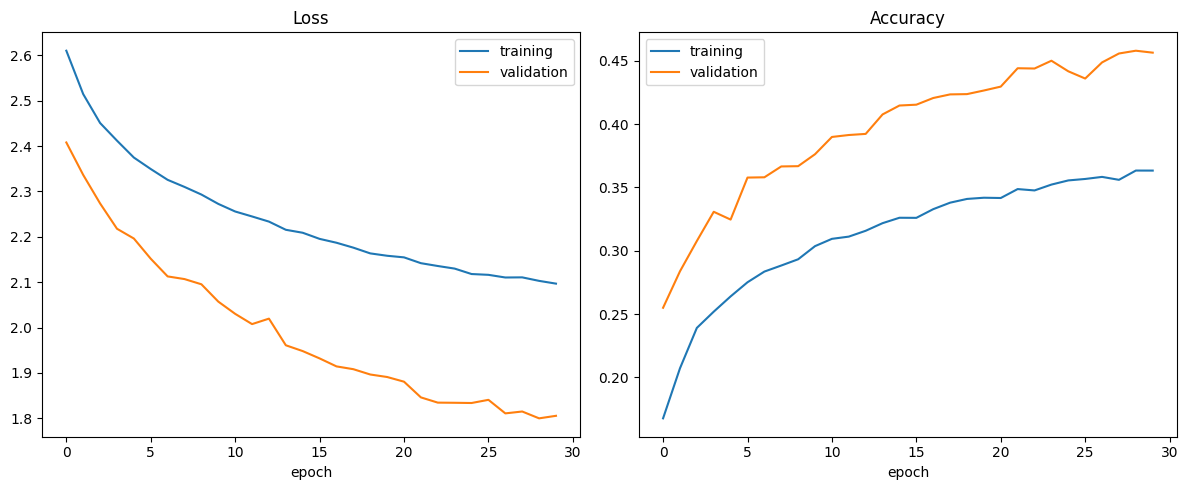

In [73]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title("Loss")
plt.xlabel("epoch")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title("Accuracy")
plt.xlabel("epoch")

plt.tight_layout()
plt.show()
